# Mean-Variance Analysis and the Sharpe Ratio

## Getting started

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [ ]:
returns = pd.read_csv("returns.csv", index_col = "Date", parse_dates = ["Date"])
returns

__GBP_USD__: Long Position in GBP (denominated in USD) <br>
__USD_GBP__: Short Position in GBP (== Long Position in USD; denominated in GBP) <br>
__Levered__: USD_GBP with Leverage ("Trading USD_GBP on Margin") <br>
__Neutral__: Neutral Positions only (no Investments / Trades)  <br>
__Low_Vol__: Active Strategy for USD_GBP with Long, Short and Neutral Positions <br>
__Random__: Random "Strategy" for USD_GBP with random Long, Short and Neutral Positions

In [ ]:
returns.info()

In [ ]:
returns.cumsum().apply(np.exp).plot(figsize = (12, 8))
plt.show()

In [ ]:
returns.Low_Vol.cumsum().apply(np.exp).plot(figsize = (12, 8))
plt.show()

In [ ]:
returns.Low_Vol.value_counts()

In [ ]:
returns[["Low_Vol", "Levered"]].cumsum().apply(np.exp).plot(figsize = (12, 8))
plt.show()

__Which one would you (intuitively) prefer?__

__Low_Vol__, right? Let´s create a __risk-adjusted return metric__ that reflects/confirms this intuition!

## Mean Return (Reward)

In [ ]:
returns

__mean return__

In [ ]:
returns.mean()

__annualized mean return__

In [ ]:
td_year = returns.count() / ((returns.index[-1] - returns.index[0]).days / 365.25)
td_year

In [ ]:
ann_mean = returns.mean() * td_year
ann_mean

In [ ]:
np.exp(ann_mean) - 1 # CAGR

In [ ]:
summary = pd.DataFrame(data = {"ann_mean":ann_mean})
summary

In [ ]:
summary.rank(ascending = False)

## Standard Deviation (Risk)

In [ ]:
returns

__Standard Deviation of Returns__

In [ ]:
returns.std()

__Annualized Standard Deviation__

In [ ]:
td_year

In [ ]:
ann_std = returns.std() * np.sqrt(td_year)
ann_std

In [ ]:
summary["ann_std"] = returns.std() * np.sqrt(td_year)

In [ ]:
summary.sort_values(by = "ann_std")

## Risk-adjusted Return ("Sharpe Ratio")

In [ ]:
summary

__Graphical Solution__

In [ ]:
summary.plot(kind = "scatter", x = "ann_std", y = "ann_mean", figsize = (15,12), s = 50, fontsize = 15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "ann_std"]+0.001, summary.loc[i, "ann_mean"]+0.001), size = 15)
plt.xlim(-0.01, 0.23)
plt.ylim(-0.02, 0.03)
plt.xlabel("Risk(std)", fontsize = 15)
plt.ylabel("Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

__Risk-adjusted Return Metric__ ("Sharpe Ratio light")

In [ ]:
rf = 0 # simplification, don´t use this assumption for Portfolio Management!

In [ ]:
summary["Sharpe"] = (summary.ann_mean - rf) / summary.ann_std

In [ ]:
summary.sort_values(by = "Sharpe", ascending = False)

In [ ]:
td_year

In [ ]:
returns.mean() / returns.std() * np.sqrt(td_year) # alternative: annualizing daily sharpe

## Putting everything together

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [ ]:
returns = pd.read_csv("returns.csv", index_col = "Date", parse_dates = ["Date"])
returns

In [ ]:
def sharpe(series, rf = 0):
    
    if series.std() == 0:
        return np.nan
    else:
        return (series.mean() - rf) / series.std() * np.sqrt(series.count() / ((series.index[-1] - series.index[0]).days / 365.25))

In [ ]:
returns.apply(sharpe, rf = 0)

In [ ]:
sharpe(series = returns.Levered, rf = 0)

------------------------------

## Coding Challenge

__Calculate and compare__ the __Sharpe Ratio__ (assumption: rf == 0) for __30 large US stocks__ that currently form the Dow Jones Industrial Average Index ("Dow Jones") for the time period between April 2019 and June 2021. 

__Hint:__ You can __import__ the price data from __"Dow_Jones.csv"__.
 

Determine the __best performing stock__ and the __worst performing stock__ according to the Sharpe Ratio.

(Remark: Dividends are ignored here. Hence, for simplicity reasons, the Sharpe Ratio is based on Price Returns only. As a consequence, dividend-paying stocks are getting penalized.) 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

def norm(sr=None):
    if sr is None:
        return np.nan
    else:
        sr.fillna(method='bfill', axis=0, inplace=True)
        return (sr.div(sr.iloc[0]))
    
def sharpe_table(norm_returns = None, rf = 0):
    result = pd.DataFrame()
    result['mean'] = norm_returns.mean() * norm_returns.count() / ((norm_returns.index[-1] - norm_returns.index[0]).days / 365.25)
    result['std'] = norm_returns.std() * np.sqrt(norm_returns.count() / ((norm_returns.index[-1] - norm_returns.index[0]).days / 365.25))
    result['shp'] = result['mean'].div(result['std'])
    return result

def plot_sharpe(df, l = 10):
    limiter = l
    #line = pd.DataFrame(data=[[0,0],[0.5,0.5]], columns=['x','y'])
    plots = df.iloc[:limiter] 
    line = pd.DataFrame(data=[[0,0],[plots['std'].max(),plots['mean'].max()]], columns=['x','y'])

    plt.figure(figsize = (12,8))

    plots.plot(kind = "scatter", x='std', y='mean', figsize = (15,8), s = 50, fontsize = 15)
    for i in plots.index:
        plt.annotate(i, xy=(plots.loc[i, "std"]+0.0005, plots.loc[i, "mean"]+0.0005), size = 15)
    plt.xlabel("Risk (std)", fontsize = 15)
    plt.ylabel("Mean Return", fontsize = 15)
    plt.title("Top {} Stocks: Mean-Variance Analysis".format(limiter), fontsize = 20)
    plt.plot(line.x, line.y, label = 'Trend Line')
    plt.show()

In [ ]:
raw = pd.read_csv('Dow_Jones.csv', parse_dates=True,index_col=['Date']).dropna()

In [ ]:
norm_raw = raw.apply(norm)
norm_returns = np.log(norm_raw/norm_raw.shift())

summary = sharpe_table(norm_returns).sort_values(by='shp', ascending=False)
list(summary.sort_values(by='shp', ascending=False).index[0:5].values)

In [ ]:
#plot_sharpe(summary, 10)
line

In [ ]:
line.y/line.x

In [4]:
summary

,mean,std,shp
AAPL,0.455535,0.367806,1.238518
MSFT,0.354346,0.332840,1.064614
GS,0.290150,0.392439,0.739349
WMT,0.164478,0.241649,0.680650
HD,0.207852,0.333215,0.623777
NKE,0.196277,0.324506,0.604849
UNH,0.220467,0.366513,0.601526
CAT,0.202222,0.356603,0.567079
V,0.180475,0.322628,0.559391
DIS,0.208602,0.375020,0.556242


## Personal Challenge: Find CAGR from portfolio of top _n_ stocks


Optimized Sharpe Portfolio: 
AAPL
MSFT
GS
CAT
HD
CRM
UNH
NKE
WMT
HON


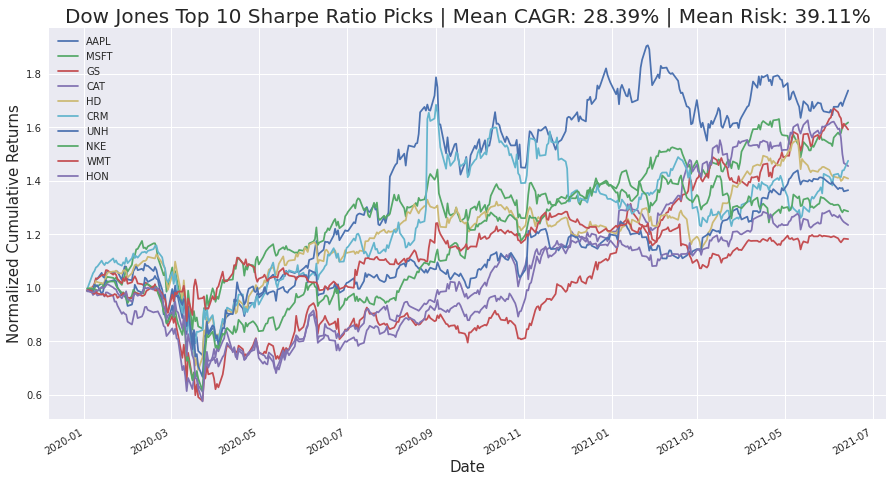

<Figure size 864x576 with 0 Axes>

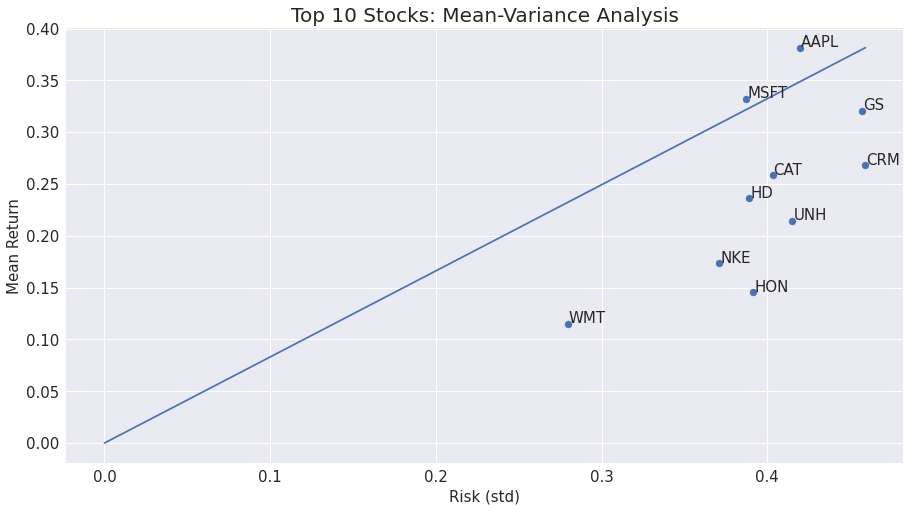

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')



################   FUNCTIONS START   ################
def norm(sr=None):
    if sr is None:
        return np.nan
    else:
        sr.fillna(method='bfill', axis=0, inplace=True)
        return (sr.div(sr.iloc[0]))
    
def sharpe_table(norm_returns = None, rf = 0):
    result = pd.DataFrame()
    result['mean'] = norm_returns.mean() * norm_returns.count() / ((norm_returns.index[-1] - norm_returns.index[0]).days / 365.25)
    result['std'] = norm_returns.std() * np.sqrt(norm_returns.count() / ((norm_returns.index[-1] - norm_returns.index[0]).days / 365.25))
    result['shp'] = result['mean'].div(result['std'])
    return result

def plot_sharpe(df, lm = 10, b = True):
    limiter = lm
    #line = pd.DataFrame(data=[[0,0],[0.5,0.5]], columns=['x','y'])
    plots = df.iloc[:limiter] 
    line = pd.DataFrame(data=[[0,0],[plots['std'].max(),plots['mean'].max()]], columns=['x','y'])

    plt.figure(figsize = (12,8))

    plots.plot(kind = "scatter", x='std', y='mean', figsize = (15,8), s = 50, fontsize = 15)
    for i in plots.index:
        plt.annotate(i, xy=(plots.loc[i, "std"]+0.0005, plots.loc[i, "mean"]+0.0005), size = 15)
    plt.xlabel("Risk (std)", fontsize = 15)
    plt.ylabel("Mean Return", fontsize = 15)
    if b:
        plt.title("Top {} Stocks: Mean-Variance Analysis".format(limiter), fontsize = 20)
    else:
        plt.title("Bottom {} Stocks: Mean-Variance Analysis".format(limiter), fontsize = 20)
    plt.plot(line.x, line.y, label = 'Trend Line')
    plt.show()
################   FUNCTIONS END   ################


#select the top n stocks ranked by Sharpe
n = 10
#change to false for the worst performing by Sharpe
best = True
start = '2020-01-01'
end = '2021-12-31'


################   IMPORT CSV AND CALC SHARPE RATIO   ################    
raw = pd.read_csv('Dow_Jones.csv', parse_dates=True,index_col=['Date']).dropna()

raw = raw.loc[start:end]
norm_raw = raw.apply(norm)
norm_returns = np.log(norm_raw/norm_raw.shift())
summary = sharpe_table(norm_returns).sort_values(by='shp', ascending=False)
summary.drop(summary.index[summary['shp'] < 0], inplace=True)
summary = summary.sort_values(by='shp', ascending=not best)


shp_portfolio = list(summary.index[0:n].values)
all_returns = np.log(norm_raw/norm_raw.shift())
all_returns.dropna(inplace=True)
all_returns = all_returns.loc[start:end,:]
best_returns = all_returns.loc[:,shp_portfolio]
td_years = ((best_returns.index[-1] - best_returns.index[0]).days)/365.25
cum_returns = best_returns.cumsum().apply(np.exp)
cum_returns
mean_multiple = cum_returns.iloc[-1].mean()
mean_cagr = mean_multiple**(1/td_years)-1
mean_cagr
mean_risk = summary['std'].mean()
print("\nOptimized Sharpe Portfolio: \n{}".format("\n".join(list(shp_portfolio))))
cum_returns.plot(figsize=(15,8))
plt.xlabel("Date", fontsize = 15)
plt.ylabel("Normalized Cumulative Returns", fontsize = 15)
if best:
    plt.title("Dow Jones Top {} Sharpe Ratio Picks | Mean CAGR: {:,.2f}% | Mean Risk: {:,.2f}%".format(n,mean_cagr*100, mean_risk*100), fontsize = 20)
else:
    plt.title("Dow Jones Bottom {} Sharpe Ratio Picks | Mean CAGR: {:,.2f}% | Mean Risk: {:,.2f}%".format(n,mean_cagr*100, mean_risk*100), fontsize = 20)
plot_sharpe(summary, n, best)
plt.show()

In [56]:
summary['std'].mean()

0.3910828292841666

### +++ Please stop here in case you don´t want to see the solution!!! +++++

## Coding Challenge Solution

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("Dow_Jones.csv", index_col = "Date", parse_dates = ["Date"])
df

In [ ]:
df.info()

In [ ]:
returns = np.log(df / df.shift()) # daily log returns
returns

In [ ]:
def sharpe(series, rf = 0):
    
    if series.std() == 0:
        return np.nan
    else:
        return (series.mean() - rf) / series.std() * np.sqrt(series.count() / ((series.index[-1] - series.index[0]).days / 365.25))

In [ ]:
returns.apply(sharpe).sort_values(ascending = False)

Best Performing Stock: __Apple__ (AAPL) <br>
Worst Performing Stock: __Non-determinable__ (note: you can´t compare negative Sharpe Ratios)